Машинное обучение
Лабораторная работа №2
Выполнил студент группы 16-В-2Горячев Е.С. Вариант №17

In [92]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

In [93]:
df = pd.read_csv('C://Users/Na_stole_64/Desktop/Jupiter_lab/4_iris/iris.data.txt', sep=',')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [94]:
df.shape

(149, 5)

In [95]:
df.count()

5.1            149
3.5            149
1.4            149
0.2            149
Iris-setosa    149
dtype: int64

# Удалите дубликаты строк в наборе данных

In [96]:
df = df.drop_duplicates()
df.shape

(146, 5)

In [97]:
df.count()

5.1            146
3.5            146
1.4            146
0.2            146
Iris-setosa    146
dtype: int64

# Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

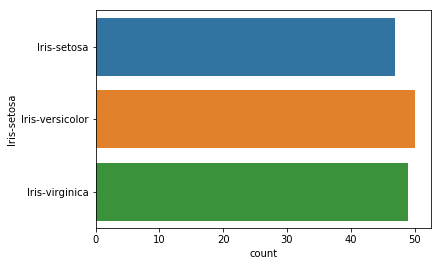

In [98]:
sns.countplot(data=df, y='Iris-setosa')
plt.show()

# Выполните масштабирование количественных признаков

In [99]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['5.1', '3.5', '1.4', '0.2']
categorial:  ['Iris-setosa']


In [100]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Выполните замену категориальных признаков

In [101]:
lb_make = LabelEncoder() 
df["Iris-setosa"] = lb_make.fit_transform(df["Iris-setosa"])
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


## Оцените корреляцию между признаков и удалите те признаки,
## которые коррелируют с наибольшим числом других
## (удалять признаки нужно только для линейных методов классификации)

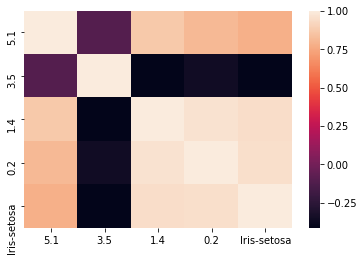

In [102]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.show()

In [103]:
df_corr

,5.1,3.5,1.4,0.2,Iris-setosa
5.1,1.000000,-0.103591,0.870793,0.816015,0.781488
3.5,-0.103591,1.000000,-0.415679,-0.350436,-0.413337
1.4,0.870793,-0.415679,1.000000,0.961405,0.947783
0.2,0.816015,-0.350436,0.961405,1.000000,0.955216
Iris-setosa,0.781488,-0.413337,0.947783,0.955216,1.000000


# Решите поставленную задачу классификации в соответствии с заданием.

In [112]:
#Разделение данных на данные для обучения и тестирования
X=np.array(df.drop('Iris-setosa',axis=1))
Y=np.array(df['Iris-setosa'])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=123)

In [113]:
#Поиск оптимального радиуса для классификатора: K ближайших соседей
knc=KNeighborsClassifier()
params={'n_neighbors':list(range(1,25))}
knc_grid=GridSearchCV(knc,params)
knc_grid.fit(X_train,Y_train)
best_num=knc_grid.best_estimator_.n_neighbors
best_score=knc_grid.best_score_

print('best train score: ', best_score,'\nat neighbors num:',best_num)

best train score:  0.9726027397260274 
at neighbors num: 1


In [114]:
knc=KNeighborsClassifier(n_neighbors=best_num)
knc.fit(X_train,Y_train)
best_score2=np.mean(Y_test==knc.predict(X_test))
print('test score: ', best_score2)

test score:  0.958904109589041


In [115]:
#Линейный классификатор (Персептрон):
perc=sk.linear_model.Perceptron()
params={'estimator__alpha': np.linspace(0,1,50)[1:],
        'estimator__n_iter':[int(50)]
}
paramsearch=GridSearchCV(estimator=perc,param_grid=dict(alpha=np.linspace(0,1,50)[1:],max_iter=[(x+1)*10 for x in range(5)]))
paramsearch.fit(X_train,Y_train)
best_score=paramsearch.best_score_
selected_alpha=paramsearch.best_estimator_.alpha
best_max_iter=paramsearch.best_estimator_.max_iter
print('best_score: ',best_score,'at alpha: ',selected_alpha)

best_score:  0.8356164383561644 at alpha:  0.02040816326530612


In [116]:
perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train)
test_score=np.mean(Y_test==perc.predict(X_test))
print('test score: ',test_score)

test score:  0.8493150684931506


In [117]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score

Y_test_binar=label_binarize(Y_test, classes=[0, 1, 2])
Y_train_binar=label_binarize(Y_train, classes=[0, 1, 2])

clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train)
probas_perc=clbc.predict_proba(X_test)

# Построение ROC-кривых:

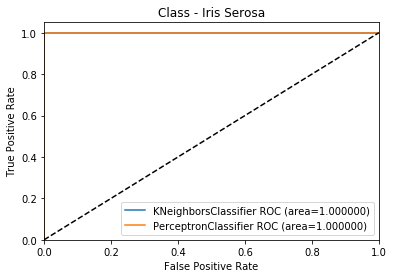

In [119]:
plt.figure()
knc1=KNeighborsClassifier(n_neighbors=best_num)
probas_knc1=knc1.fit(X_train,Y_train_binar[:,0]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,0],probas_knc1[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,0])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,0])
probas_perc1=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,0],probas_perc1[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Serosa')
plt.show()

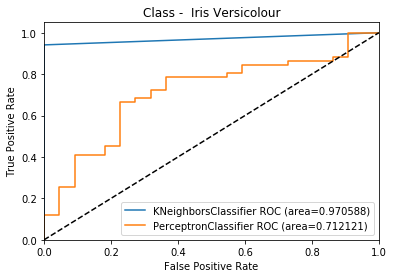

In [120]:
plt.figure()
knc2=KNeighborsClassifier(n_neighbors=best_num)
probas_knc2=knc2.fit(X_train,Y_train_binar[:,1]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,1],probas_knc2[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,1])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,1])
probas_perc2=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,1],probas_perc2[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class -  Iris Versicolour')
plt.show()

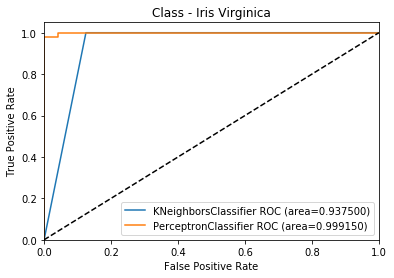

In [121]:
knc3=KNeighborsClassifier(n_neighbors=best_num)
probas_knc3=knc3.fit(X_train,Y_train_binar[:,2]).predict_proba(X_test)
tpr,fpr,thresholds = roc_curve(Y_test_binar[:,2],probas_knc3[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='KNeighborsClassifier ROC (area=%f)' % roc_auc)

perc=sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=best_max_iter)
perc.fit(X_train,Y_train_binar[:,2])
clbc=CalibratedClassifierCV(perc,cv=10,method='sigmoid')
clbc.fit(X_train,Y_train_binar[:,2])
probas_perc3=clbc.predict_proba(X_test)
tpr,fpr,thresholds=roc_curve(Y_test_binar[:,2],probas_perc3[:,0])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='PerceptronClassifier ROC (area=%f)' % roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Virginica')
plt.show()

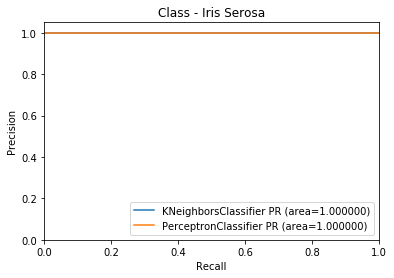

In [122]:
#PR-кривые:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,0],probas_knc1[:,1])
aps_knc=average_precision_score(Y_test_binar[:,0],probas_knc1[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,0],probas_perc1[:,1])
aps_perc=average_precision_score(Y_test_binar[:,0],probas_perc1[:,1])
plt.plot(recall,precision,label='PerceptronClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Serosa')
plt.show()

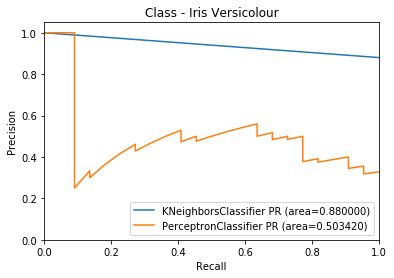

In [123]:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,1],probas_knc2[:,1])
aps_knc=average_precision_score(Y_test_binar[:,1],probas_knc2[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,1],probas_perc2[:,1])
aps_perc=average_precision_score(Y_test_binar[:,1],probas_perc2[:,1])
plt.plot(recall,precision,label='PerceptronClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Versicolour')
plt.show()

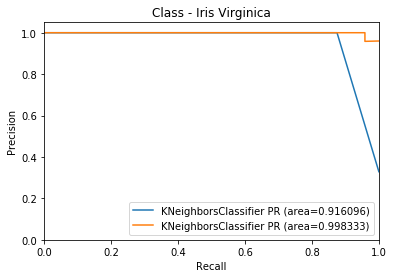

In [124]:
precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,2],probas_knc3[:,1])
aps_knc3=average_precision_score(Y_test_binar[:,2],probas_knc3[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_knc3)

precision,recall,thresholds=precision_recall_curve(Y_test_binar[:,2],probas_perc3[:,1])
aps_perc=average_precision_score(Y_test_binar[:,2],probas_perc3[:,1])
plt.plot(recall,precision,label='KNeighborsClassifier PR (area=%f)' % aps_perc)

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4,fontsize='medium')
plt.title('Class - Iris Virginica')
plt.show()